In [1]:
import fastf1 as ff1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
ff1.Cache.enable_cache('../cache')

In [3]:
preseason = ff1.get_testing_event(2024, 1)

In [6]:
p1 = preseason.get_practice(1)
p1.load()

p2 = preseason.get_practice(2)
p2.load()

p3 = preseason.get_practice(3)
p3.load()

core           INFO 	Loading data for Pre-Season Testing - Practice 1 [v3.0.7]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has

In [246]:
def compound_color(compound):
    match compound:
        case 'HARD' : return 'lightgrey'
        case 'MEDIUM' : return 'gold'
        case 'SOFT' : return 'red'

def day_marker(day):
    match day:
        case 1 : return 'o:'
        case 2 : return 'D:'
        case 3 : return 's:'

# Pick out stints of a session
def pick_stints(laps, min_len = 5, quicklaps_threshold = 1.10):
    laps = laps.pick_quicklaps(quicklaps_threshold)
    laps.set_index('LapNumber', inplace=True)
    laps['LapTime'] = [t.total_seconds() for t in laps['LapTime']]
    stints = [x for _, x in laps.groupby(['Stint', 'Driver'])]
    stints = [stint for stint in stints if len(stint) > min_len]
    return stints

/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/620950342.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_1['Day'] = 1
/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/620950342.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_2['Day'] = 2
/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/620950342.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

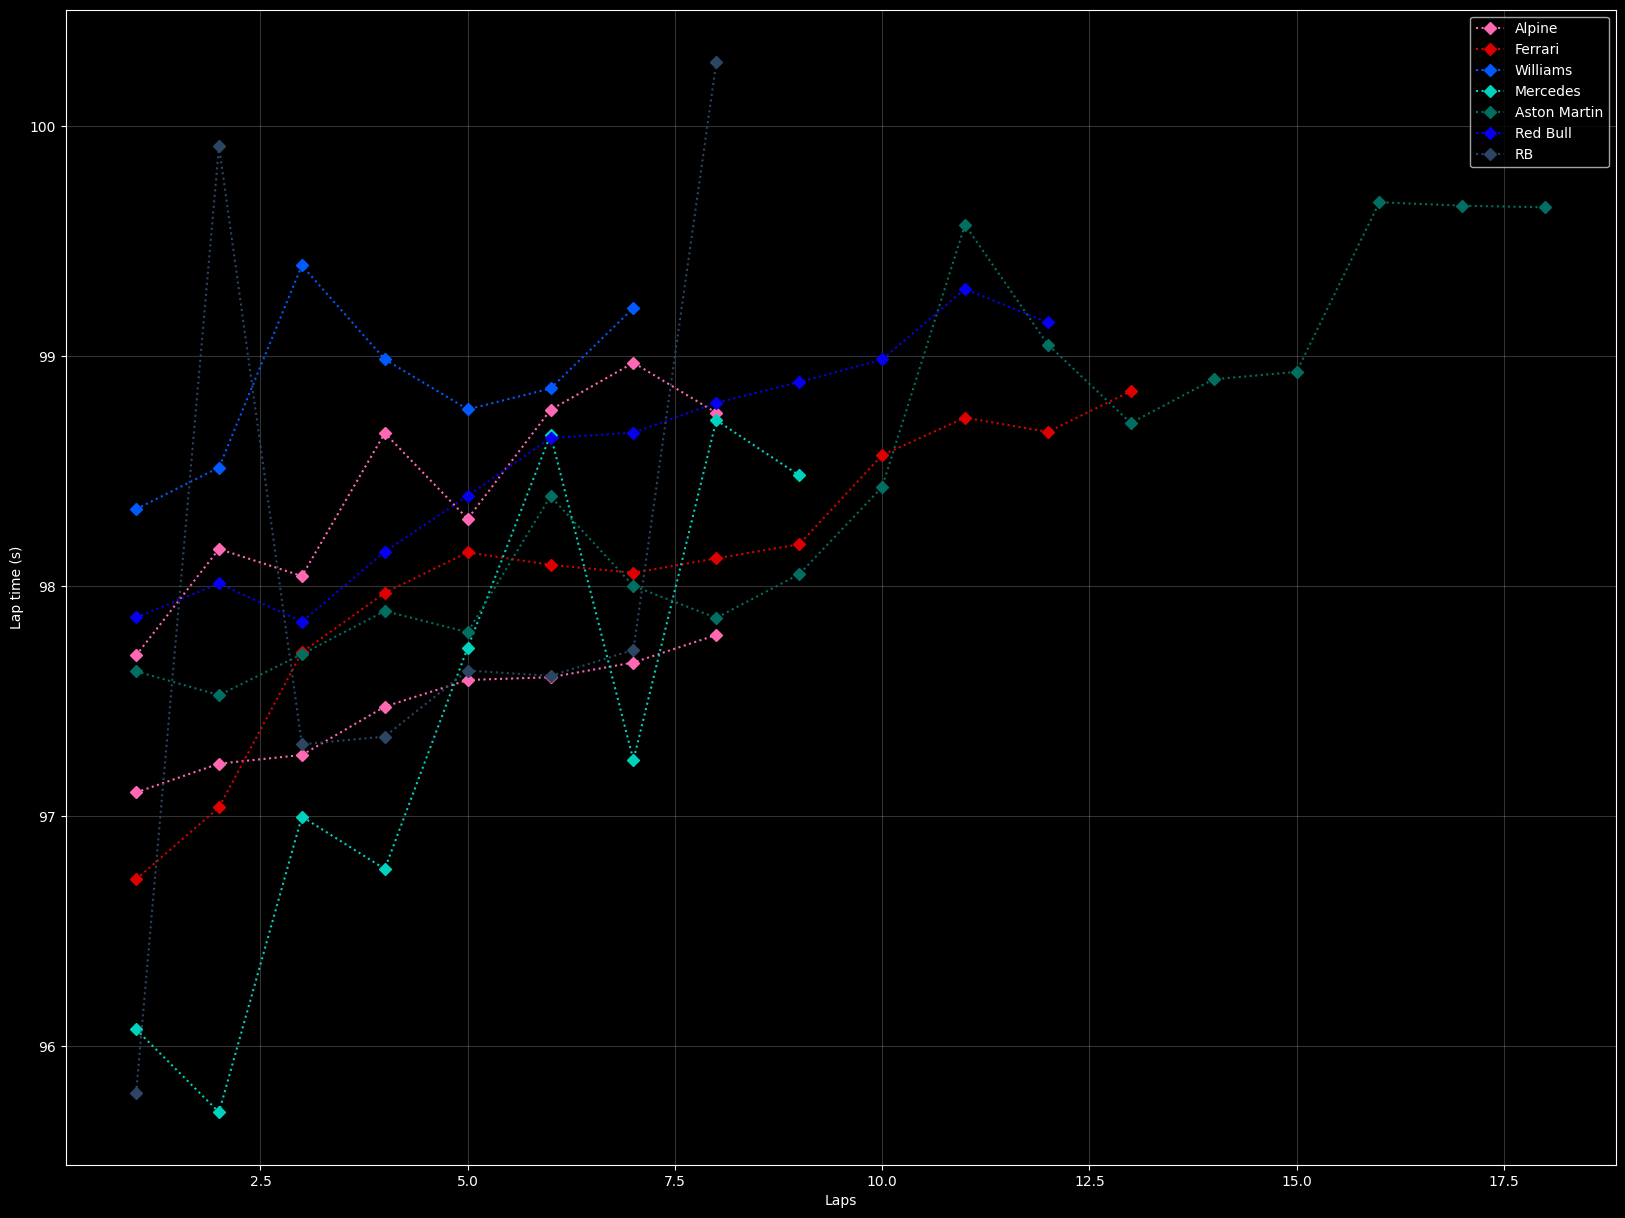

In [324]:
from fastf1 import plotting
def compare_long_runs_deg(day1, day2, day3, remove_outlier=False):
    laps_1 = day1
    laps_2 = day2
    laps_3 = day3

    laps_1['Day'] = 1
    laps_2['Day'] = 2
    laps_3['Day'] = 3

    laps_1['Color'] = laps_1['Compound'].apply(compound_color)
    laps_2['Color'] = laps_2['Compound'].apply(compound_color)
    laps_3['Color'] = laps_3['Compound'].apply(compound_color)

    laps_1 = laps_1.pick_team('Alpine')
    laps_2 = laps_2.pick_team('Alpine')
    laps_3 = laps_3.pick_team('Alpine')

    stints_1 = pick_stints(laps_1)
    stints_2 = pick_stints(laps_2)
    stints_3 = pick_stints(laps_3)

    ferrari_baseline = pick_stints(p2.laps.pick_team('Ferrari'))[:1]
    williams_baseline = pick_stints(p2.laps.pick_team('Williams'))[:1]
    mercedes_baseline = pick_stints(p2.laps.pick_team('Mercedes'))[:1]
    red_bull_baseline = pick_stints(p2.laps.pick_team('Red Bull Racing'))[:1]
    aston_martin_baseline = pick_stints(p2.laps.pick_team('Aston Martin'))[:1]
    rb_baseline = pick_stints(p2.laps.pick_team('RB'))[:1]

    # remove some eye picked outliers. Gasly's stint is not a long stint but multiple quick laps
    if remove_outlier:
        stints_1 = stints_1[1:]

    plt.figure(figsize=(20, 15))
    ax = plt.subplot()
    ax.grid(zorder=10, alpha=0.2)
    ax.set_xlabel('Laps')
    ax.set_ylabel('Lap time (s)')

    alpine_label = 'Alpine'
    # plot day 1
    for stint in stints_1:
        s = stint.reset_index()
        marker = day_marker(s['Day'][0])
        #ax.plot(s.index + 1, s['LapTime'], marker, color = 'hotpink', label = alpine_label)
        #alpine_label = None

    # plot day 2
    for stint in stints_2:
        s = stint.reset_index()
        marker = day_marker(s['Day'][0])
        ax.plot(s.index + 1, s['LapTime'], marker, color='hotpink', label = alpine_label)
        alpine_label = None

    # plot day 3
    for stint in stints_3:
        s = stint.reset_index()
        marker = day_marker(s['Day'][0])
        #ax.plot(s.index + 1, s['LapTime'], marker, color='hotpink', label = alpine_label)
        #alpine_label = None

    # Ferrari baseline
    for stint in ferrari_baseline:
        s = stint.reset_index()
        marker = day_marker(s['Day'][0])
        ax.plot(s.index + 1, s['LapTime'], marker, color=plotting.TEAM_COLORS['ferrari'], label = 'Ferrari')

    # Williams baseline
    for stint in williams_baseline:
        s = stint.reset_index()
        marker = day_marker(s['Day'][0])
        ax.plot(s.index + 1, s['LapTime'], marker, color=plotting.TEAM_COLORS['williams'], label = 'Williams')

    # Mercedes baseline
    for stint in mercedes_baseline:
        s = stint.reset_index()
        marker = day_marker(s['Day'][0])
        ax.plot(s.index + 1, s['LapTime'], marker, color=plotting.TEAM_COLORS['mercedes'], label = 'Mercedes')
    
    # aston baseline
    for stint in aston_martin_baseline:
        s = stint.reset_index()
        marker = day_marker(s['Day'][0])
        ax.plot(s.index + 1, s['LapTime'], marker, color=plotting.TEAM_COLORS['aston martin'], label = 'Aston Martin')
    
    # red bull baseline
    for stint in red_bull_baseline:
        s = stint.reset_index()
        marker = day_marker(s['Day'][0])
        ax.plot(s.index + 1, s['LapTime'], marker, color=plotting.TEAM_COLORS['red bull'], label = 'Red Bull')
    
    # RB baseline
    for stint in rb_baseline:
        s = stint.reset_index()
        marker = day_marker(s['Day'][0])
        ax.plot(s.index + 1, s['LapTime'], marker, color=plotting.TEAM_COLORS['alphatauri'], label = 'RB')
    
    plt.legend()
    plt.show()

compare_long_runs_deg(p1.laps[p1.laps['Compound'] == 'HARD'], 
                      p2.laps[p2.laps['Compound'] == 'HARD'], 
                      p3.laps[p3.laps['Compound'] == 'HARD'], True)


/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/3930177040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_1['Day'] = 1
/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/3930177040.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_2['Day'] = 2
/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/3930177040.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

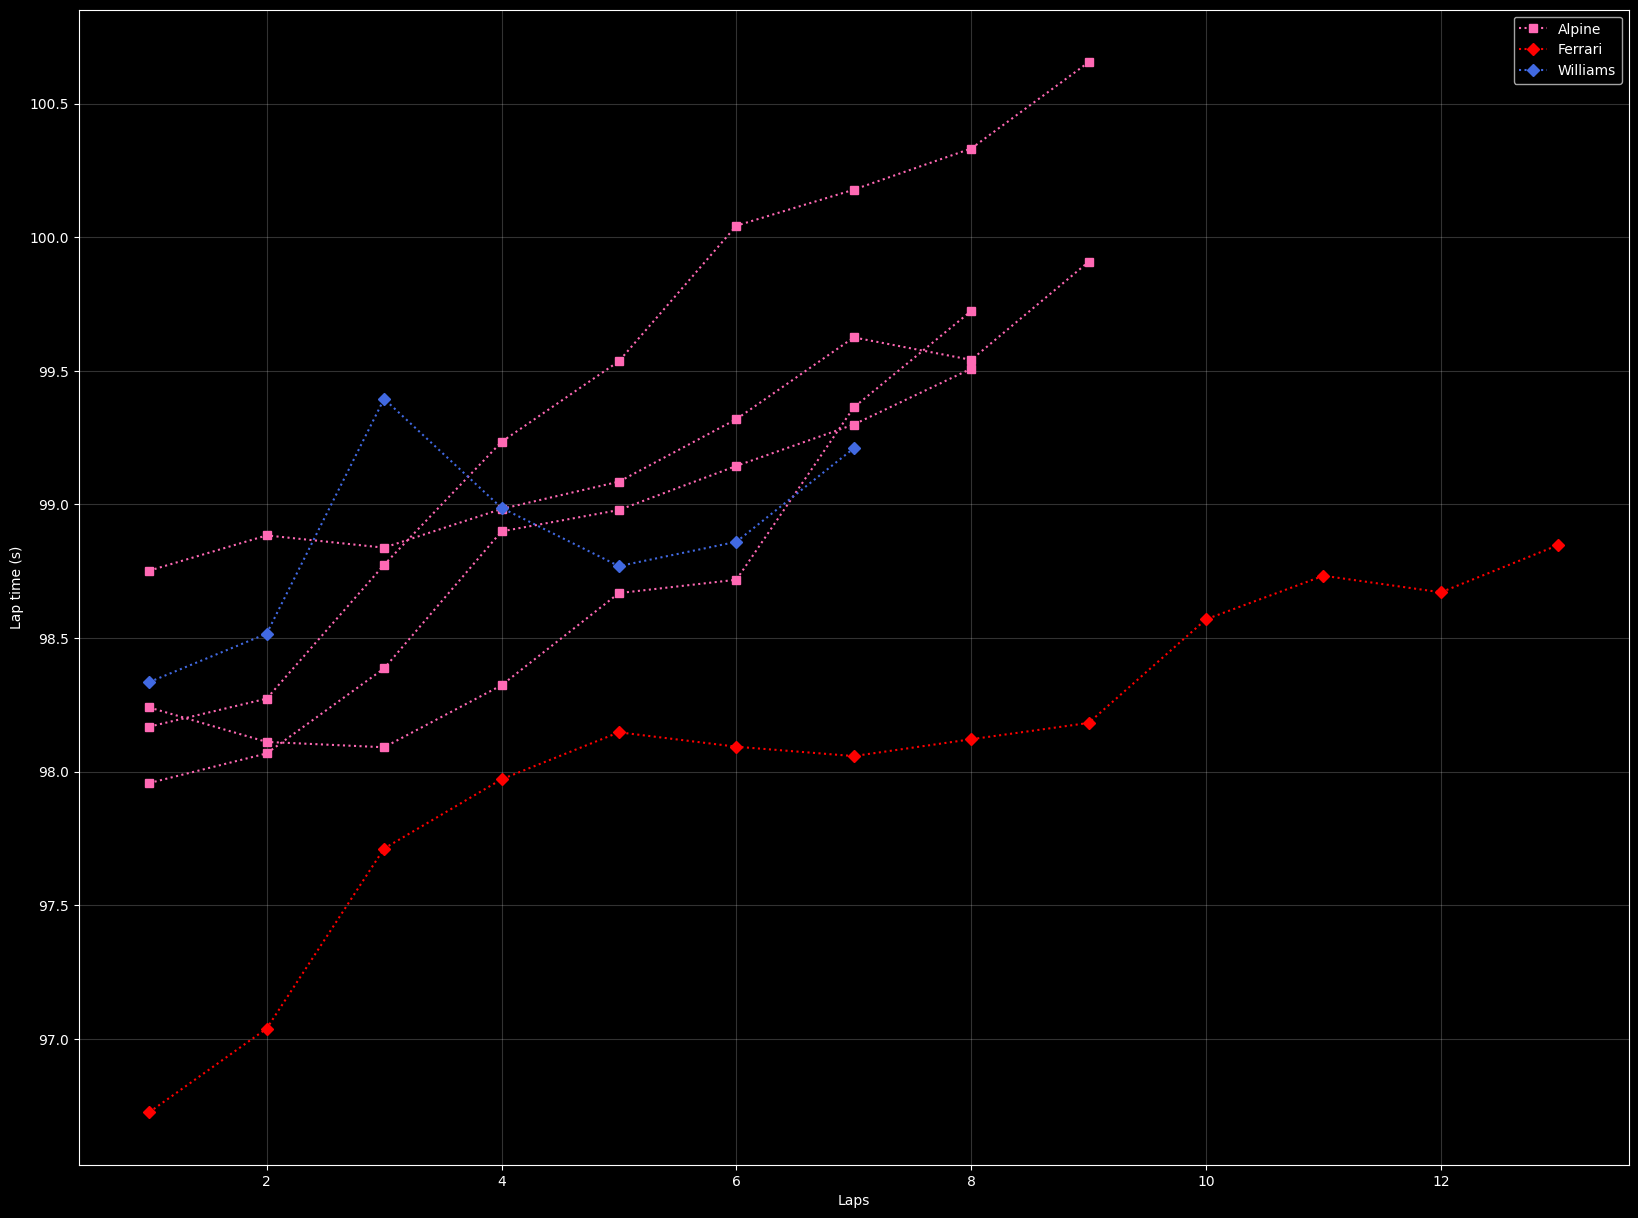

In [260]:
compare_long_runs_deg(p1.laps[p1.laps['Compound'] == 'MEDIUM'], 
                      p2.laps[p2.laps['Compound'] == 'MEDIUM'], 
                      p3.laps[p3.laps['Compound'] == 'MEDIUM'], True)

In [240]:
laps_1 = p1.laps
laps_2 = p2.laps
laps_3 = p3.laps

laps_1['Day'] = 1
laps_2['Day'] = 2
laps_3['Day'] = 3

laps_1['Color'] = laps_1['Compound'].apply(compound_color)
laps_2['Color'] = laps_2['Compound'].apply(compound_color)
laps_3['Color'] = laps_3['Compound'].apply(compound_color)

laps_1 = laps_1.pick_team('Alpine')
laps_2 = laps_2.pick_team('Alpine')
laps_3 = laps_3.pick_team('Alpine')

stints_1 = pick_stints(laps_1)
stints_2 = pick_stints(laps_2)
stints_3 = pick_stints(laps_3)

ferrari_baseline = pick_stints(p2.laps.pick_team('Ferrari'))[:1]
williams_baseline = pick_stints(p2.laps.pick_team('Williams'))[:1]

/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/528303512.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapTime'] = [t.total_seconds() for t in laps['LapTime']]
/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/528303512.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapTime'] = [t.total_seconds() for t in laps['LapTime']]
/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/528303512.py:11: SettingWithCopyWarning: 
A value is trying to be

[                            Time Driver DriverNumber  LapTime  Stint  \
 LapNumber                                                              
 51.0      0 days 06:11:31.363000    SAR            2   98.335   18.0   
 52.0      0 days 06:13:09.879000    SAR            2   98.516   18.0   
 53.0      0 days 06:14:49.274000    SAR            2   99.395   18.0   
 54.0      0 days 06:16:28.261000    SAR            2   98.987   18.0   
 55.0      0 days 06:18:07.030000    SAR            2   98.769   18.0   
 56.0      0 days 06:19:45.890000    SAR            2   98.860   18.0   
 57.0      0 days 06:21:25.100000    SAR            2   99.210   18.0   
 
           PitOutTime PitInTime            Sector1Time            Sector2Time  \
 LapNumber                                                                      
 51.0             NaT       NaT 0 days 00:00:31.686000 0 days 00:00:42.482000   
 52.0             NaT       NaT 0 days 00:00:31.462000 0 days 00:00:42.679000   
 53.0            

In [212]:
print("Day 1 : ", len(stints_1), " - Day 2 : ", len(stints_2), " - Day 3 : ", len(stints_3))

Day 1 :  2  - Day 2 :  2  - Day 3 :  4


In [223]:
# remove some eye picked outliers. Gasly's stint is not a long stint but multiple quick laps
stints_1 = stints_1[0:1]

In [193]:
plt.style.use('dark_background')

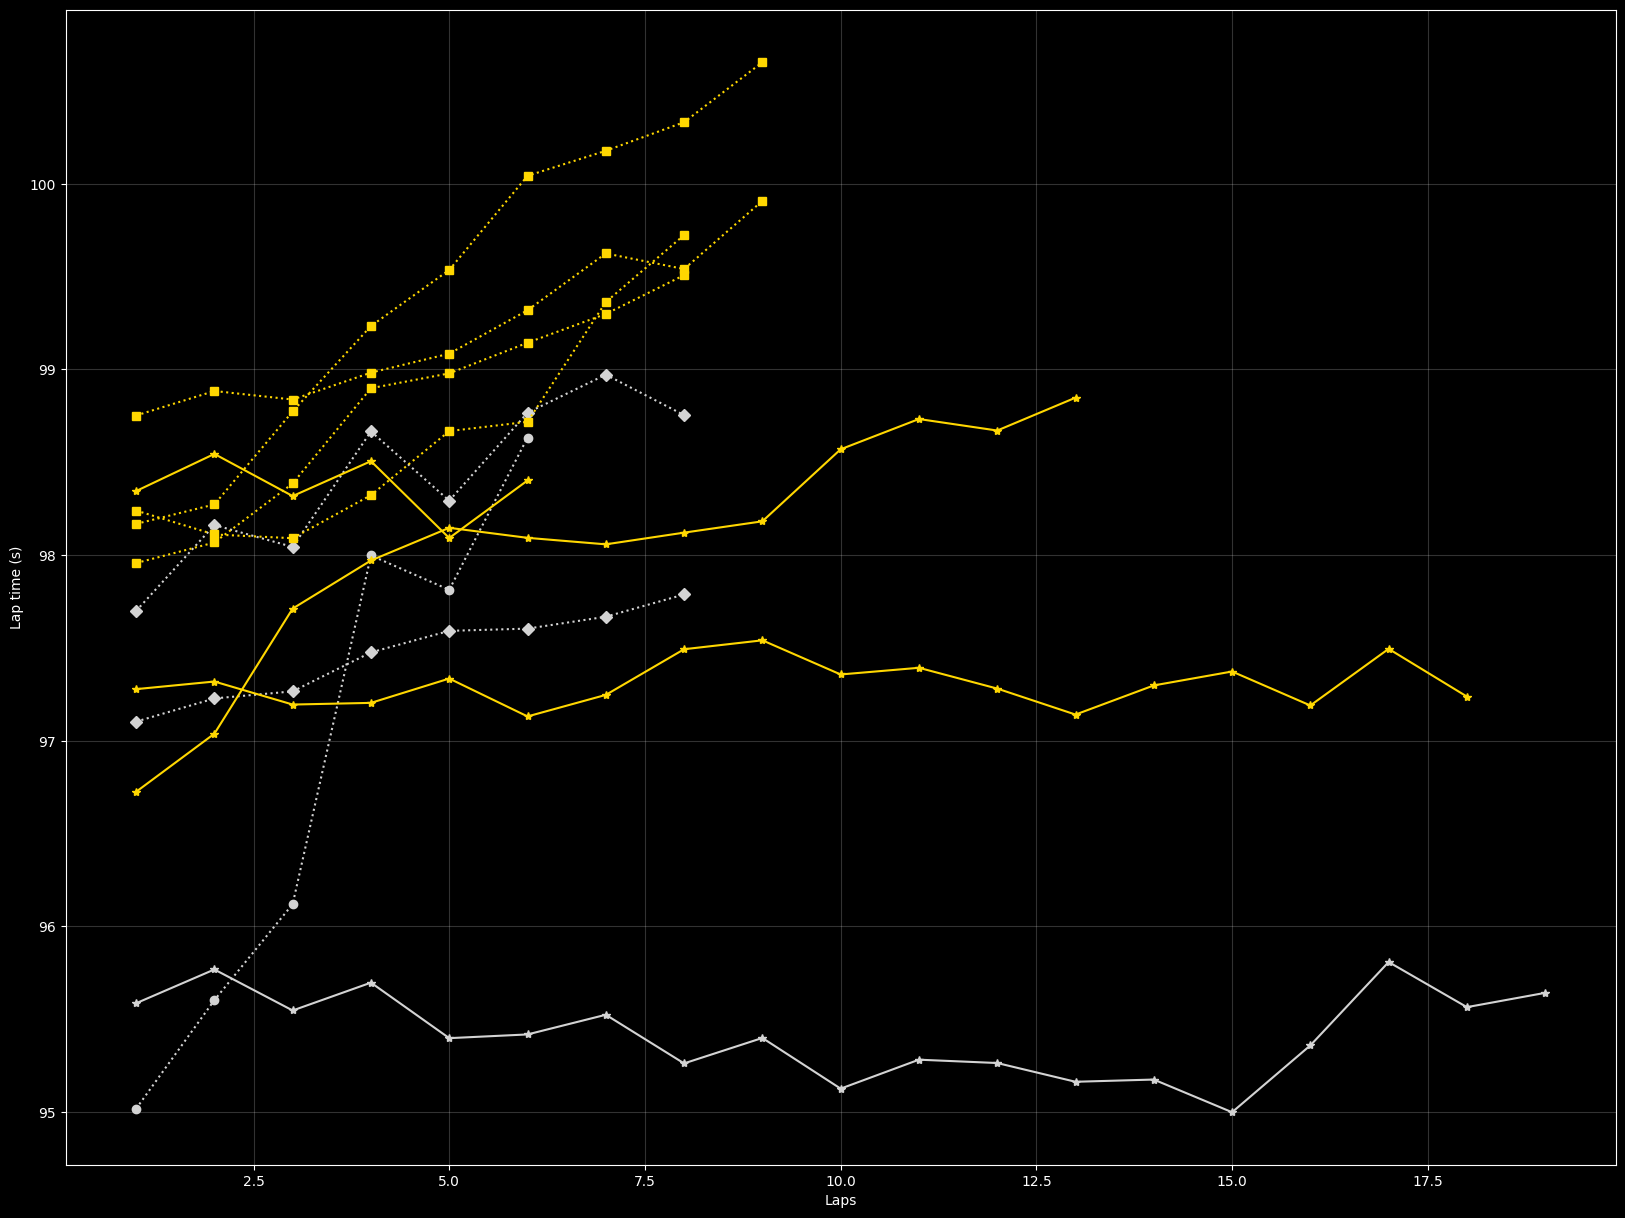

In [224]:
plt.figure(figsize=(20, 15))
ax = plt.subplot()
ax.grid(zorder=10, alpha=0.2)
ax.set_xlabel('Laps')
ax.set_ylabel('Lap time (s)')

# plot day 1
marker = 'o:'
for stint in stints_1:
    s = stint.reset_index()
    ax.plot(s.index + 1, s['LapTime'], marker, color = s['Color'][0])

marker = 'D:'
# plot day 2
for stint in stints_2:
    s = stint.reset_index()
    ax.plot(s.index + 1, s['LapTime'], marker, color=s['Color'][0])

marker = 's:'
# plot day 3
for stint in stints_3:
    s = stint.reset_index()
    ax.plot(s.index + 1, s['LapTime'], marker, color=s['Color'][0])

marker = '*-'
# Ferrari baseline
for stint in ferrari_baseline:
    s = stint.reset_index()
    ax.plot(s.index + 1, s['LapTime'], marker, color=s['Color'][0])

marker = ''
# Williams baseline
for stint in ferrari_baseline:
    s = stint.reset_index()
    ax.plot(s.index + 1, s['LapTime'], marker, color=s['Color'][0])


/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/365202627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocon_laps['LapTime'] = [t.total_seconds() for t in ocon_laps['LapTime']]


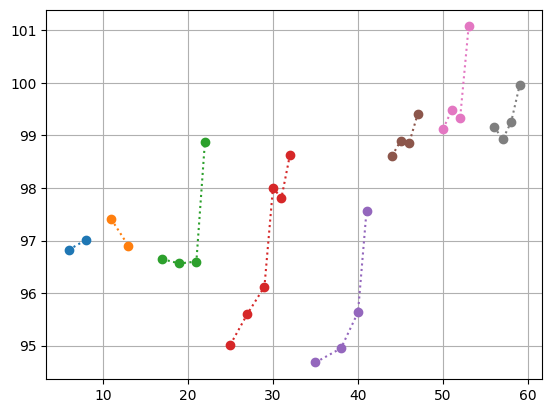

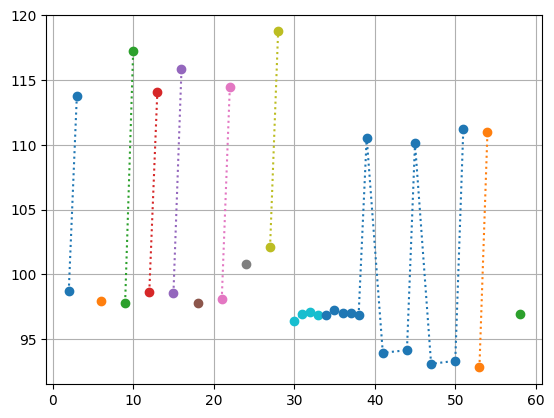

In [80]:
def plot_testing(session, driver, limit=1.30):
    laps = session.laps.pick_quicklaps(limit)

    ocon_laps = laps[laps['Driver'] == driver]
    ocon_laps.set_index('LapNumber', inplace=True)
    ocon_laps['LapTime'] = [t.total_seconds() for t in ocon_laps['LapTime']]
    ocon_laps

    ocon_stints = [x for _, x in ocon_laps.groupby('Stint')]

    ax = plt.subplot()

    for stint in ocon_stints:
        ax.plot(stint['LapTime'], 'o:')
    ax.grid()
    plt.show()

plot_testing(p1, 'OCO')
plot_testing(p1, 'GAS')
#plot_testing(p1, 'RIC')
#plot_testing(p1, 'ALO')
#plot_testing(p1, 'BOT')

core           INFO 	Loading data for Pre-Season Testing - Practice 2 [v3.0.7]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has

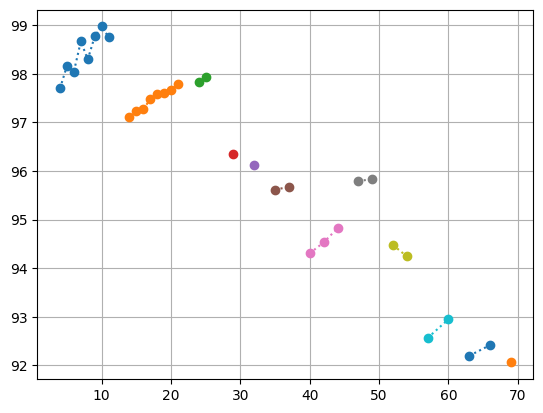

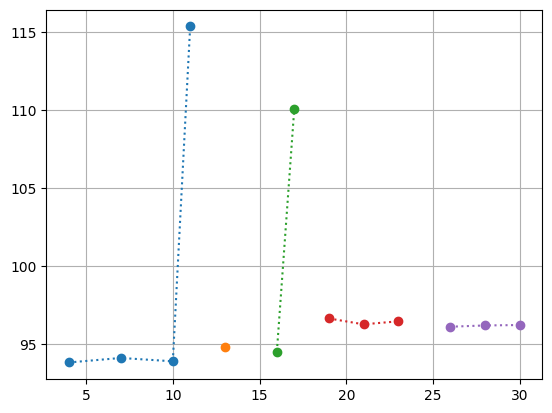

In [76]:

plot_testing(p2, 'OCO')
plot_testing(p2, 'GAS')

core           INFO 	Loading data for Pre-Season Testing - Practice 3 [v3.0.7]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 23: Encountered 1 timing integrity error(s) near lap(s): [39].
This might be a bug and should be reported.
req            INFO 	Data has been written to cache!
req            INFO 	N

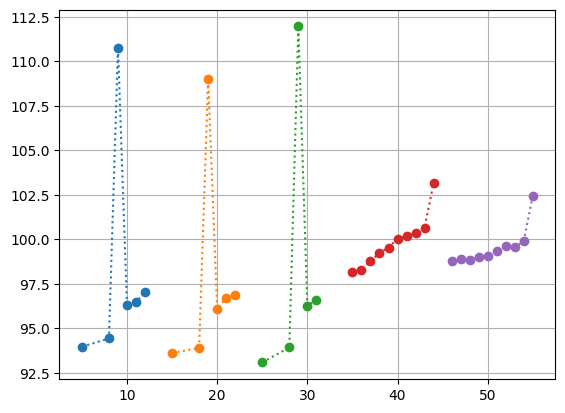

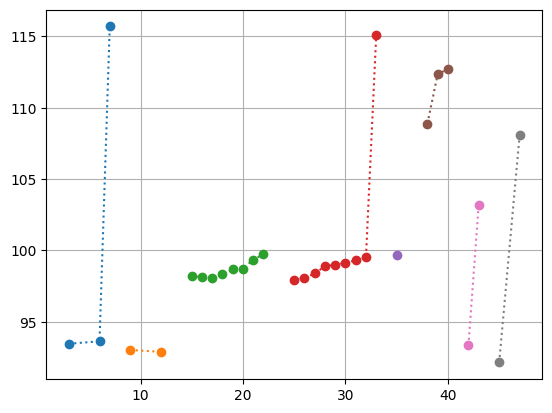

In [79]:

plot_testing(p3, 'OCO')
plot_testing(p3, 'GAS')